## Problem Statement:
### Read any image. Display the outputs of contrast stretching, intensity level slicing.

In [3]:
import cv2
from cv2 import Mat
import numpy as np
from matplotlib import pyplot as plt

def cv2_imshow(image: Mat):
    plt.imshow(image)
    plt.show()

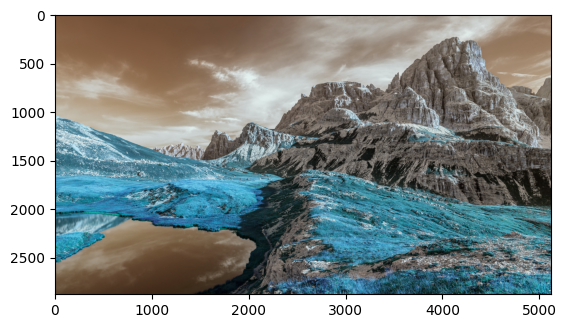

In [4]:
image_path = '5k_image.jpg'

image = cv2.imread(image_path)
cv2_imshow(image)

## A) Contrast Stretching:

In [5]:
# Split the image into its R, G, and B channels
channels = cv2.split(image)

# Initialize the stretch factors
stretch_factors = []

# Calculate the stretch factor for each channel
for channel in channels:
  # Calculate the minimum and maximum values in the channel
  min_val, max_val, _, _ = cv2.minMaxLoc(channel)

  # Calculate the stretch factor
  stretch_min = 0
  stretch_max = 255
  stretch_factor_1 = (stretch_max - stretch_min) / (max_val - min_val)
  stretch_factor_2 = stretch_min - stretch_factor_1 * min_val

  # Store the stretch factor for this channel
  stretch_factors.append((stretch_factor_1, stretch_factor_2))

# Initialize the stretched image
stretched_image = np.zeros_like(image)

# Stretch the contrast of each channel
for i, channel in enumerate(channels):
  stretched_channel = cv2.convertScaleAbs(channel, alpha=stretch_factors[i][0], beta=stretch_factors[i][1])
  stretched_image[:,:,i] = stretched_channel

## Difference between the original image and contrast stretched image:

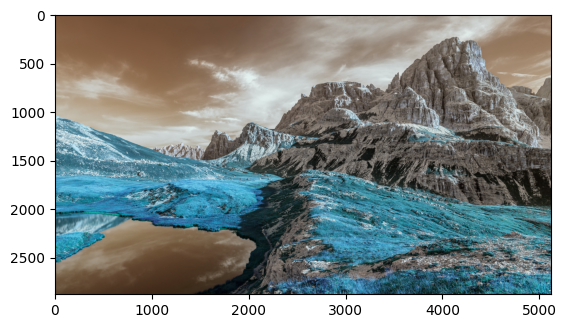

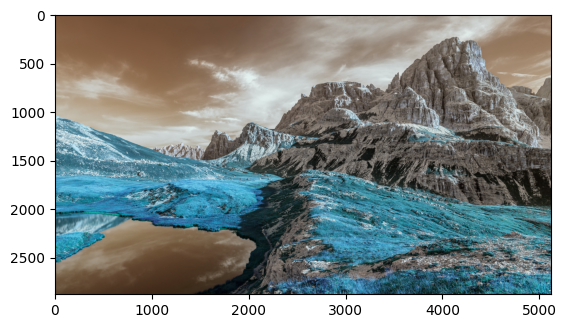

In [6]:
cv2_imshow(image)
cv2_imshow(stretched_image)

## B) Intensity Level Slicing:
This code will load the image, convert it to grayscale, and then create a mask with the specified intensity range. The mask is then applied to the original image to create the intensity sliced version of the image.

In [7]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the lower and upper intensity levels
lower_level = 100
upper_level = 250

# Create a mask with the intensity range
mask = cv2.inRange(gray, lower_level, upper_level)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)

## Difference between the original image and the intensity sliced image:

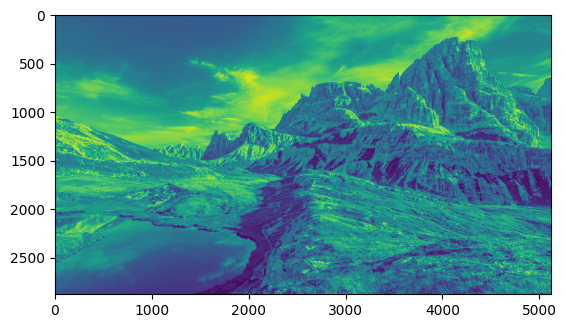

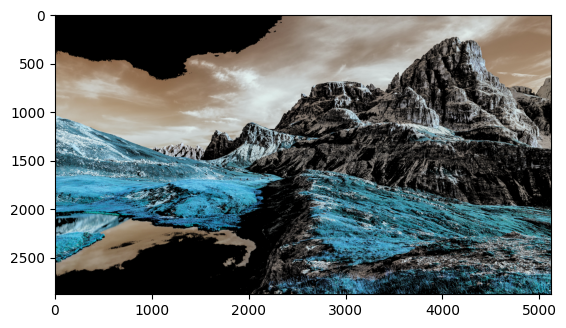

In [8]:
cv2_imshow(gray)
cv2_imshow(result)